In [2]:
import pandas as pandas
import pandas as pd
import seaborn as seab
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans,SpectralBiclustering,OPTICS,DBSCAN
import kneed

#зчитування датасету з csv-файлу
df=pd.read_csv("Country-data.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
#EDA (exploratory data analysis)

In [3]:
#опис стовпців та статистики датасету, за винятком nan-значень
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [4]:
#перевіряємо суму нульових значень за кожним стовпцем
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
#опис стовпців датасету, разом з їх типом та кількість не null значень
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


/tmp/ipykernel_85038/1434026868.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seab.heatmap(df.corr(), annot=True, linewidths=0.3)


<AxesSubplot: >

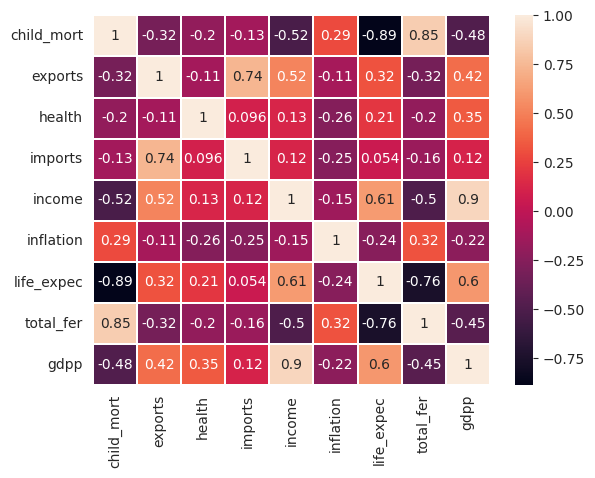

In [5]:
#побудова теплової карти через seaborn
#з анотаціями та відділенням кожного квадрату лінією товщиною 0.3 (для зручності сприйняття)
#попарна кореляція рядків між собою за винятком nan-значень
seab.heatmap(df.corr(), annot=True, linewidths=0.3)

<AxesSubplot: xlabel='gdpp', ylabel='income'>

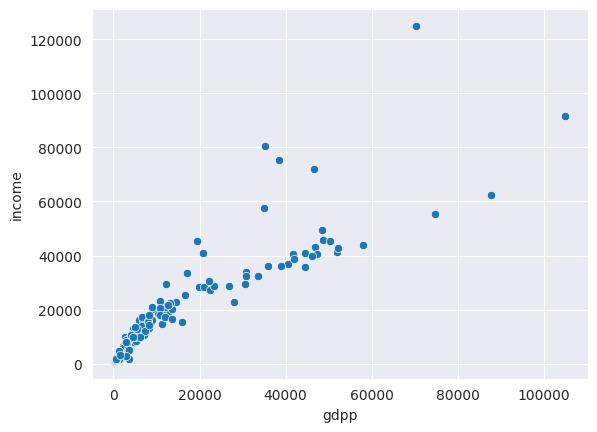

In [6]:
seab.scatterplot(data=df,x="gdpp",y="income")

<AxesSubplot: xlabel='gdpp', ylabel='child_mort'>

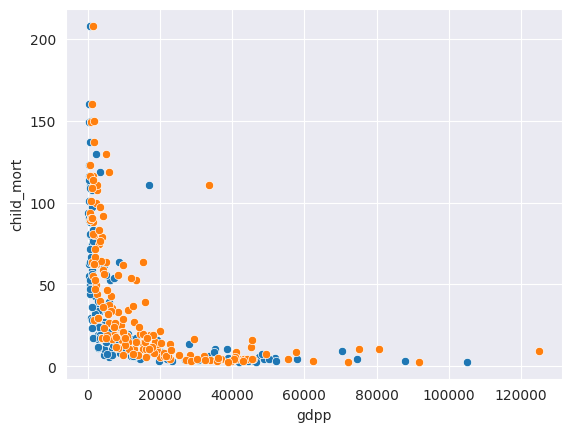

In [7]:
seab.scatterplot(data=df,x='gdpp',y='child_mort')
seab.scatterplot(data=df,x='income',y='child_mort')

In [37]:
#пошук максимального gdpp
gdpp_max=df['gdpp'].max()
display('максимальне gdpp= ',gdpp_max)

#пошук багатих країн
rich_countries=df[df['gdpp']>gdpp_max/2]
display('багаті країни',rich_countries)

#мінімальне gdpp
gdpp_min=df['gdpp'].min()
display('мінімальне gdpp= ',gdpp_min)

#середнє gdpp
gdpp_avg=df['gdpp'].mean()
display('середнє gdpp= ',gdpp_avg)

#визначення низького рівня gdpp
low_gdpp=0
if (gdpp_avg/10) > (gdpp_min*10):
    low_gdpp=gdpp_min*10
else:
    low_gdpp=gdpp_avg/10

#пошук бідних країн
poor_countries=df[df['gdpp']<low_gdpp]
print('бідні країни')
poor_countries

'максимальне gdpp= '

105000

'багаті країни'

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600


'мінімальне gdpp= '

231

'середнє gdpp= '

12964.155688622754

бідні країни


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553
12,Bangladesh,49.4,16.000,3.52,21.8000,2440,7.140,70.4,2.33,758
17,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231
27,Cambodia,44.4,54.100,5.68,59.5000,2520,3.120,66.1,2.88,786
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897
36,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769
37,"Congo, Dem. Rep.",116.0,41.100,7.91,49.6000,609,20.800,57.5,6.54,334


In [41]:
#видалення назв країн (нормалізація)
#це треба для алгоритмів (зокрема minmaxscaler, адже рядкові значення не можливо
#перетворити в числові, особливо якщо цей рядок не містить чисел)
df_values=df.drop(['country'],axis=1)
#колонок вже 9, а не 10
df_values

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [40]:
scal=MinMaxScaler()
df_normalized=scal.fit_transform(df_values)
df_normalized=pandas.DataFrame(df_normalized,columns=df_values.columns,index=df_values.index)
df_normalized

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


<AxesSubplot: xlabel='gdpp', ylabel='income'>

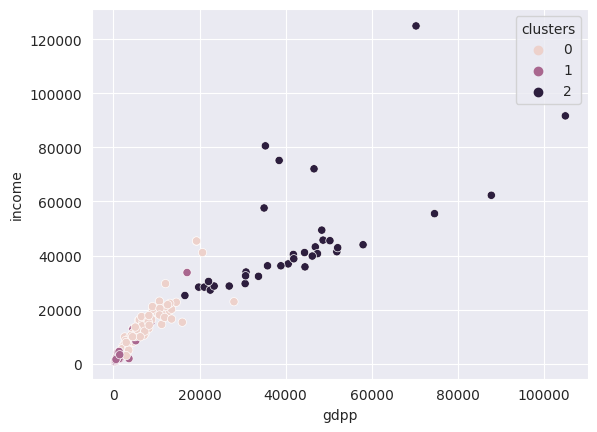

In [48]:
#К-means розбиття на кластери
inertias=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit_transform(df_values)
    inertias.append(kmeans.inertia_)
klusters=kneed.KneeLocator(range(1,11),inertias,curve="convex",direction="decreasing")
#метод локтя
#кількість кластерів
cluster_number=klusters.elbow
#скористання функцією передбачення
clusters=KMeans(cluster_number).fit_predict(df_normalized)
df['clusters']=clusters
plt.xlabel('gdpp')
#кореляція між валовим продуктом на душу населення та доходом
plt.ylabel('income')
#система розбила дані на 3 кластери
seab.scatterplot(data=df,x='gdpp',y='income',
                 hue='clusters')
#параметр hue дозволяє кожен кластер розфарбувати в різний колір

<AxesSubplot: xlabel='gdpp', ylabel='health'>

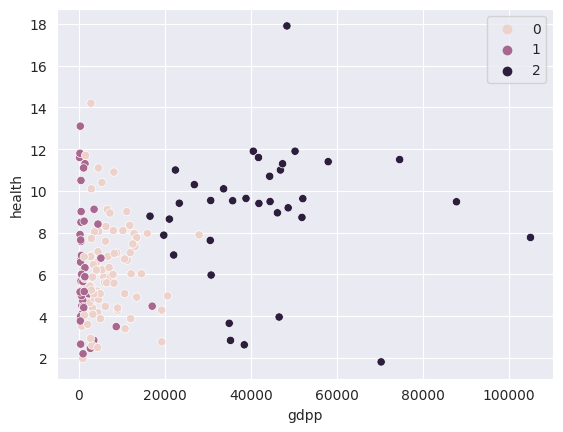

In [51]:
#кореляція між ВВП на душу населення та здоров'ям
plt.xlabel('gdpp')
plt.ylabel('health')
seab.scatterplot(data=df,x='gdpp',y='health',
                 hue=clusters)

<AxesSubplot: xlabel='gdpp', ylabel='child_mort'>

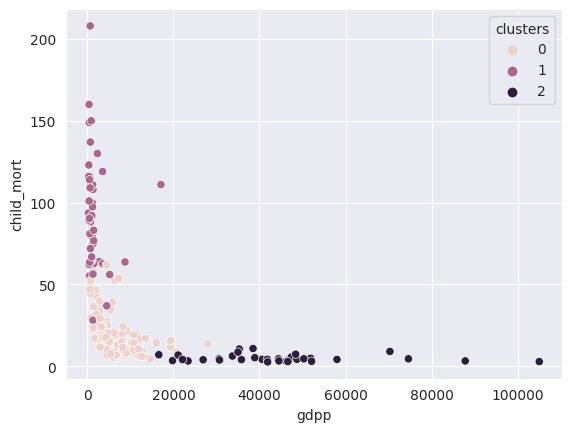

In [50]:
#кореляція між ВВП на душу населення та дитячою смертністю
plt.xlabel('gdpp')
plt.ylabel('child_mort')
seab.scatterplot(data=df,x='gdpp',y='child_mort',
                 hue='clusters')
#як бачимо, в країн з високим gdpp дитяча смертність низька
#в країн з низьким gdpp дисяча смертність дуже висока

<AxesSubplot: title={'center': 'Кореляція між ВВП на душу та доходом'}, xlabel='gdpp', ylabel='income'>

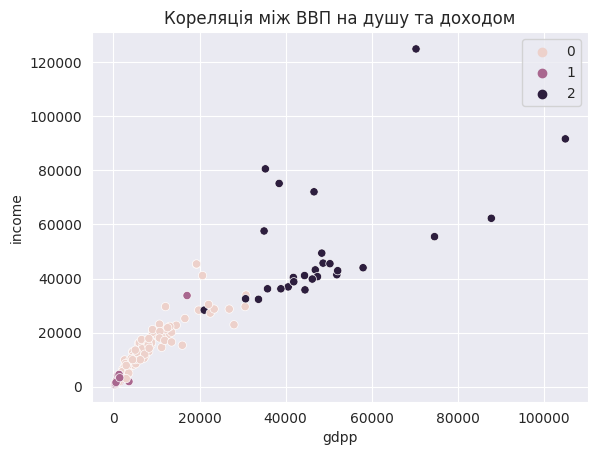

In [70]:
from sklearn.cluster import SpectralClustering

#спектральна кластеризація
spectral_clusters=SpectralClustering(n_clusters=cluster_number).fit_predict(df_normalized)
plt.xlabel('gdpp')
plt.ylabel('income')
plt.title('Кореляція між ВВП на душу та доходом')
seab.scatterplot(data=df,x='gdpp',y='income',
                 hue=spectral_clusters)

<AxesSubplot: title={'center': 'Кореляція між ВВП на душу та дитячою смертністю'}, xlabel='gdpp', ylabel='child_mort'>

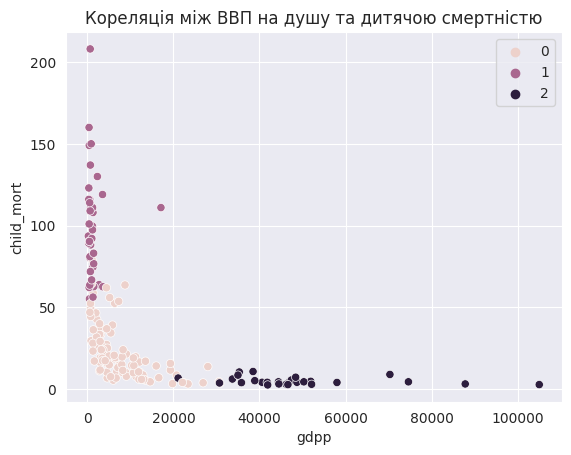

In [71]:
plt.xlabel('gdpp')
plt.ylabel('child_mort')
plt.title('Кореляція між ВВП на душу та дитячою смертністю')
seab.scatterplot(data=df,x='gdpp',y='child_mort',
                 hue=spectral_clusters)

<AxesSubplot: title={'center': 'Кореляція між ВВП на душу та здоровям'}, xlabel='gdpp', ylabel='health'>

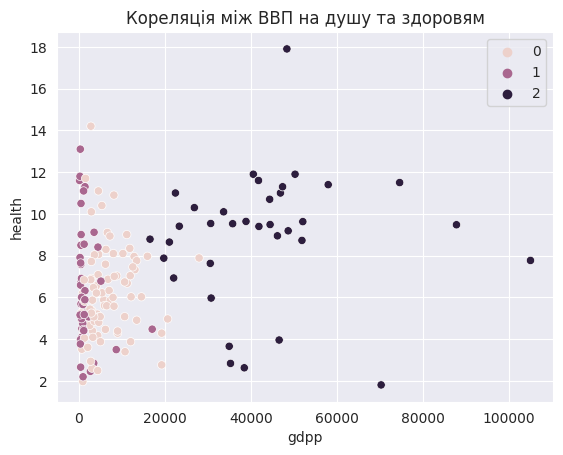

In [55]:
plt.xlabel('gdpp')
plt.ylabel('health')
plt.title('Кореляція між ВВП на душу та здоровям')
seab.scatterplot(data=df,x='gdpp',y='health',
                 hue=clusters)

<AxesSubplot: xlabel='gdpp', ylabel='income'>

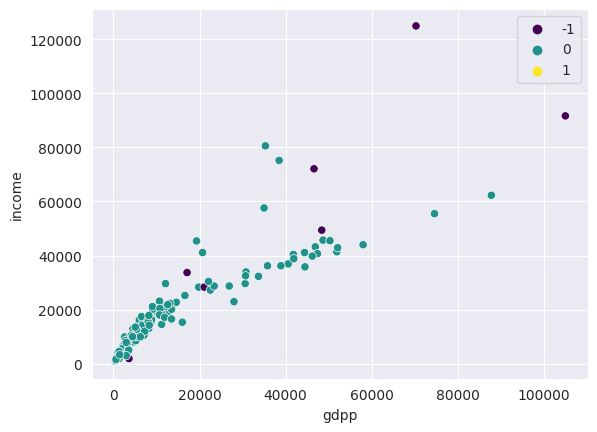

In [60]:
#кластеризація з допомогою dbscan
db_clusters=DBSCAN(eps=0.3,min_samples=2).fit_predict(df_normalized)
df['db_clusters']=db_clusters
plt.xlabel('gdpp')
plt.ylabel('income')
seab.scatterplot(data=df,x='gdpp',y='income',hue=db_clusters,palette="viridis")

<AxesSubplot: title={'center': 'ВВП на душу та здоровя'}, xlabel='gdpp', ylabel='health'>

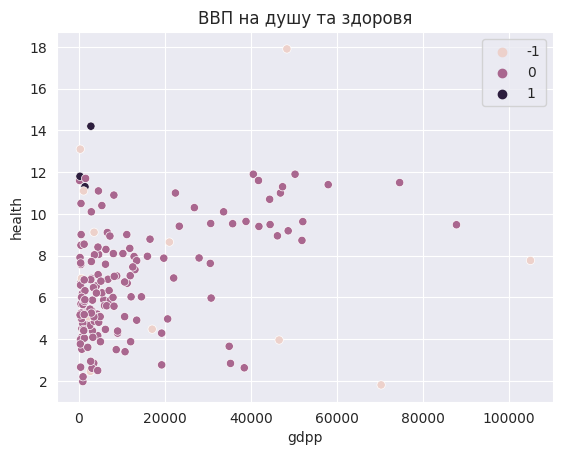

In [64]:
plt.xlabel('gdpp')
plt.ylabel('health')
plt.title("ВВП на душу та здоровя")
seab.scatterplot(data=df,x='gdpp',y='health',
                 hue=db_clusters)

<AxesSubplot: title={'center': 'ВВП на душу та дитяча смертність'}, xlabel='gdpp', ylabel='child_mort'>

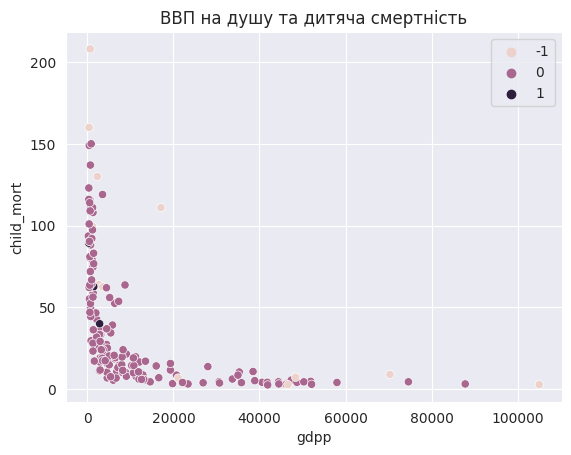

In [63]:
plt.xlabel('gdpp')
plt.ylabel('child_mort')
plt.title('ВВП на душу та дитяча смертність')
seab.scatterplot(data=df,x='gdpp',y='child_mort',
                 hue=db_clusters)

In [69]:
#10 країн з найменшою дитячою смертністю
df[['country','child_mort','gdpp']].nsmallest(10,['child_mort'])

,country,child_mort,gdpp
68,Iceland,2.6,41900
91,Luxembourg,2.8,105000
133,Singapore,2.8,46600
53,Finland,3.0,46200
144,Sweden,3.0,52100
77,Japan,3.2,44500
114,Norway,3.2,87800
135,Slovenia,3.2,23400
43,Czech Republic,3.4,19800
42,Cyprus,3.6,30800


In [68]:
#10 країн з найвищою дитячою смертністю
df[['country','child_mort','gdpp']].nlargest(10,['child_mort'])

,country,child_mort,gdpp
66,Haiti,208.0,662
132,Sierra Leone,160.0,399
32,Chad,150.0,897
31,Central African Republic,149.0,446
97,Mali,137.0,708
113,Nigeria,130.0,2330
112,Niger,123.0,348
3,Angola,119.0,3530
25,Burkina Faso,116.0,575
37,"Congo, Dem. Rep.",116.0,334
